In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
import random
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

In [16]:
data = pd.read_csv("output_x3_y2.csv")
data

,SimulationID,XStripID1,XStripID2,XStripID3,YStripID1,YStripID2,XStripEnergy1,XStripEnergy2,XStripEnergy3,YStripEnergy1,YStripEnergy2,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
0,21.0,57.0,58.0,59.0,14.0,15.0,2257.35060,2165.1500,1271.35550,1026.87620,4666.9800,2.95201,-2.02961,0.41519,-0.54951,0.51058,-0.66132
1,36.0,61.0,62.0,63.0,9.0,10.0,400.52655,1166.0273,3033.71070,494.10294,4106.1616,3.41162,-2.58698,-0.39820,0.82161,0.34985,0.45007
2,104.0,23.0,24.0,25.0,22.0,23.0,273.60820,3569.1910,248.37600,22.11386,4069.0613,-0.76151,-1.03766,-0.44442,-0.94984,-0.22595,0.21621
3,121.0,14.0,15.0,16.0,11.0,12.0,2070.05440,2871.7617,60.25229,4701.77540,300.2929,-1.84121,-2.28089,0.43284,-0.32884,-0.94282,-0.05442
4,261.0,5.0,6.0,7.0,61.0,62.0,316.64460,2398.5034,971.94116,1968.43320,1718.6561,-2.84561,3.38132,-0.25611,0.28997,0.61591,0.73251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15418,999643.0,23.0,24.0,25.0,16.0,17.0,632.67566,3719.3232,1634.60680,2521.55620,3465.0498,-0.70219,-1.76062,-0.28759,-0.02828,0.07029,0.99713
15419,999718.0,0.0,1.0,2.0,2.0,3.0,2205.06930,1332.2078,807.50710,413.05948,3931.7246,-3.39885,-3.26421,-0.54197,-0.93665,0.09052,0.33837
15420,999722.0,60.0,61.0,62.0,5.0,6.0,2455.05960,1598.4548,1827.95760,2579.25370,3302.2183,3.24318,-3.00021,0.41527,0.65122,-0.54537,0.52772
15421,999801.0,49.0,50.0,51.0,62.0,63.0,1651.33580,2821.1562,309.69025,2228.38000,2553.8022,2.39682,3.96626,0.63021,-0.18068,-0.97825,-0.10190


In [ ]:
# feature_cols = ["XStripID1", "XStripID2", "XStripID3", "YStripID1", "YStripID2", "XStripEnergy1", "XStripEnergy2", "XStripEnergy3", "YStripEnergy1", "YStripEnergy2"]
# feature_cols = ["XStripID1", "XStripID2", "YStripID1", "XStripEnergy1", "XStripEnergy2", "YStripEnergy1"]
feature_cols = []
for label in data.columns:
    if label[0] == "X" or label[0] == "Y":
        feature_cols.append(label)
    elif label[0] == "R":
        break

label_cols = ["ResultPositionX", "ResultPositionY", "ResultDirectionX", "ResultDirectionY"]
x = data[feature_cols]
y = data[label_cols]
x, y

['XStripID1', 'XStripID2', 'XStripID3', 'YStripID1', 'YStripID2', 'XStripEnergy1', 'XStripEnergy2', 'XStripEnergy3', 'YStripEnergy1', 'YStripEnergy2']


(       XStripID1  XStripID2  XStripID3  YStripID1  YStripID2  XStripEnergy1  \
 0           57.0       58.0       59.0       14.0       15.0     2257.35060   
 1           61.0       62.0       63.0        9.0       10.0      400.52655   
 2           23.0       24.0       25.0       22.0       23.0      273.60820   
 3           14.0       15.0       16.0       11.0       12.0     2070.05440   
 4            5.0        6.0        7.0       61.0       62.0      316.64460   
 ...          ...        ...        ...        ...        ...            ...   
 15418       23.0       24.0       25.0       16.0       17.0      632.67566   
 15419        0.0        1.0        2.0        2.0        3.0     2205.06930   
 15420       60.0       61.0       62.0        5.0        6.0     2455.05960   
 15421       49.0       50.0       51.0       62.0       63.0     1651.33580   
 15422       26.0       27.0       28.0       30.0       31.0      934.18820   
 
        XStripEnergy2  XStripEnergy3  

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12345)

In [25]:

multi_output_rf = RandomForestRegressor(n_estimators=400, random_state=12345, verbose=1)
multi_output_rf.fit(
    x_train, y_train
)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   17.1s


RandomForestRegressor(n_estimators=400, random_state=12345, verbose=1)

In [11]:
y_pred = multi_output_rf.predict(x_test)

In [13]:
y_pred, y_test

(array([[ 0.93737848,  2.00301655, -0.12549215,  0.08260792],
        [-1.08987422, -1.59753907,  0.05446798, -0.06386802],
        [-0.7915909 , -2.84424515, -0.31038272,  0.30874505],
        ...,
        [ 0.81795872, -0.60107075, -0.07322547, -0.15303042],
        [-1.80467355,  0.27951323,  0.11095938,  0.13112812],
        [ 0.79511195, -2.66294417, -0.2855689 ,  0.15906298]],
       shape=(4627, 4)),
        ResultPositionX  ResultPositionY  ResultDirectionX  ResultDirectionY
 11922          0.91786          1.92100          -0.69652           0.64327
 2557          -0.04691         -1.62035           0.75375          -0.62074
 8733           2.91316         -2.82375           0.15565          -0.89425
 12999          3.19146         -1.07306           0.06834          -0.84315
 12805         -2.65217          0.39797           0.49239           0.46564
 ...                ...              ...               ...               ...
 3146          -0.58023         -3.28059          

In [14]:
distance = []
direction = []

for i in range(len(y_test)):
    error_x = y_test.iloc[i].iloc[0] - y_pred[i][0]
    error_y = y_test.iloc[i].iloc[1] - y_pred[i][1]
    distance.append(math.sqrt(error_x ** 2 + error_y**2))

    dp = y_test.iloc[i].iloc[2]  * y_pred[i][2] + y_test.iloc[i].iloc[3]  * y_pred[i][3]
    mag1 = math.sqrt(y_test.iloc[i].iloc[2] ** 2 + y_test.iloc[i].iloc[3] ** 2)
    mag2 = math.sqrt(y_pred[i][2] ** 2 + y_pred[i][3] ** 2)
    direction.append(math.degrees(math.acos(dp / mag1 / mag2)) * random.choice([1, -1]))

Average distance: 3.1892991093291183


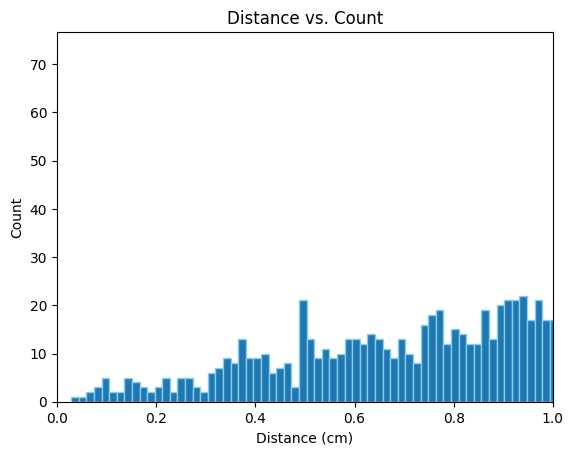

In [134]:
print("Average distance:", np.average(distance))
plt.hist(distance, bins=500, edgecolor='skyblue')
bottom, top = plt.ylim()
# plt.ylim(0, 10)
plt.xlim(0, 1)
plt.xlabel('Distance (cm)')
plt.ylabel('Count')
plt.title('Distance vs. Count')
plt.show()

Average direction: -0.7824867279353718


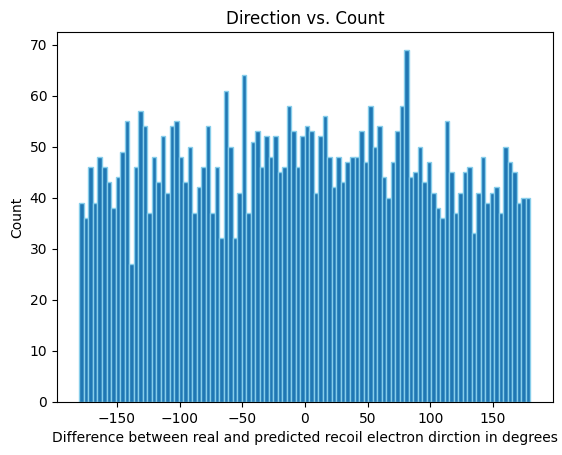

In [15]:
print("Average direction:", np.average(direction))
plt.hist(direction, bins=100, edgecolor='skyblue')
plt.xlabel('Difference between real and predicted recoil electron dirction in degrees')
plt.ylabel('Count')
plt.title('Direction vs. Count')
plt.show()